In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

# PREPROCESSING

## Converting Excel Data into Pivot Tables (also removes KPIs that only have null values)

In [2]:
df = pd.read_excel("data.xlsx") # Importing the excel takes time

df["DATE"] = df["DATE"].astype(str)

city_list = list(sorted(set(df["CITY"])))
raw_city_dfs = dict()
cities = dict()

for city in city_list:
    sub_df = df[df["CITY"]==city]
    
    city_df = pd.pivot_table(sub_df, columns="KPI",
                     index="DATE",
                     values="VALUE")
    raw_city_dfs[city] = city_df
    cities[len(cities)] = city

In [3]:
print("Start Date  End Date Days, KPIS")
for city in cities.values():
    print(raw_city_dfs[city].index[0], raw_city_dfs[city].index[-1], raw_city_dfs[city].shape)

# Some cities don't have data after the 15th of August. 
# Also, since we are comparing KPI performances, every city should have the same KPIs. The others should be dropped.

Start Date  End Date Days, KPIS
2023-07-20 2023-08-17 (29, 109)
2023-07-20 2023-08-16 (28, 84)
2023-07-20 2023-08-15 (27, 84)
2023-07-20 2023-08-16 (28, 84)
2023-07-20 2023-08-16 (28, 92)
2023-07-20 2023-08-16 (28, 88)
2023-07-20 2023-08-16 (28, 88)
2023-07-20 2023-08-16 (28, 84)
2023-07-20 2023-08-16 (28, 84)
2023-07-20 2023-08-16 (28, 109)
2023-07-20 2023-08-15 (27, 84)
2023-07-20 2023-08-16 (28, 84)
2023-07-20 2023-08-20 (32, 108)
2023-07-20 2023-08-16 (28, 84)
2023-07-20 2023-08-16 (28, 108)
2023-07-20 2023-08-16 (28, 88)
2023-07-20 2023-08-15 (27, 83)
2023-07-20 2023-08-16 (28, 108)
2023-07-20 2023-08-16 (28, 91)
2023-07-20 2023-08-15 (27, 88)
2023-07-20 2023-08-16 (28, 84)
2023-07-20 2023-08-16 (28, 96)
2023-07-20 2023-08-16 (28, 108)
2023-07-20 2023-08-16 (28, 108)


## Removing KPIs That Don't Exist in All City Data

In [4]:
city_dfs = raw_city_dfs.copy()
for i in range(len(cities)-1):
    for j in range(i+1, len(cities)):
        city1 = cities[i]
        city2 = cities[j]
        city1_kpis = set(city_dfs[city1].columns)
        city2_kpis = set(city_dfs[city2].columns)

        city1s_unique_kpis = city1_kpis - city2_kpis
        city2s_unique_kpis = city2_kpis - city1_kpis

        city_dfs[city1] = city_dfs[city1].drop(city1s_unique_kpis, axis=1)
        city_dfs[city2] = city_dfs[city2].drop(city2s_unique_kpis, axis=1)

kpis = list(set(city_dfs["CITY-1"].columns))
kpis.sort(key=lambda x:int(x.split("-")[1]))
kpi_types = {kpi : df[df["KPI"]==kpi]["KIND"].iloc[0] for kpi in kpis}

In [5]:
print("Start Date  End Date Days, KPIS")
for city in cities.values():
    print(city_dfs[city].index[0], city_dfs[city].index[-1], city_dfs[city].shape)

Start Date  End Date Days, KPIS
2023-07-20 2023-08-17 (29, 81)
2023-07-20 2023-08-16 (28, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-16 (28, 81)
2023-07-20 2023-08-16 (28, 81)
2023-07-20 2023-08-16 (28, 81)
2023-07-20 2023-08-16 (28, 81)
2023-07-20 2023-08-16 (28, 81)
2023-07-20 2023-08-16 (28, 81)
2023-07-20 2023-08-16 (28, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-16 (28, 81)
2023-07-20 2023-08-20 (32, 81)
2023-07-20 2023-08-16 (28, 81)
2023-07-20 2023-08-16 (28, 81)
2023-07-20 2023-08-16 (28, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-16 (28, 81)
2023-07-20 2023-08-16 (28, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-16 (28, 81)
2023-07-20 2023-08-16 (28, 81)
2023-07-20 2023-08-16 (28, 81)
2023-07-20 2023-08-16 (28, 81)


## Removing Days That Don't Exist in All City Data

In [6]:
earliest_last_day = min([city_dfs[city].index[-1] for city in cities.values()])

for city in cities.values():
    temp = city_dfs[city]
    temp = temp[city_dfs[city].index <= earliest_last_day]
    city_dfs[city] = temp
    
dates = list(sorted(set(city_dfs["CITY-1"].index)))

In [7]:
print("Start Date  End Date Days, KPIS")
for city in cities.values():
    print(city_dfs[city].index[0], city_dfs[city].index[-1], city_dfs[city].shape)

Start Date  End Date Days, KPIS
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)
2023-07-20 2023-08-15 (27, 81)


## Checking If There Are Any More Null Values and Filling w/ Median If So

In [8]:
for city in cities.values():
    test = city_dfs[city]
    total_nulls = 0
    for i in range(len(test.index)):
        for j in range(len(test.columns)):
            if type(test.iloc[i,j]) != np.float64:
                total_nulls += 1
                
    if total_nulls != 0:
        city_dfs[city] = city_dfs[city].fillna(np.median(city_dfs[city]))
        print(f"There were {total_nulls} nulls for city data of {city}.")


# ANOMALY DETECTION

## Creating functions for plotting anomalies

In [9]:
def prior_day_data(city_name, kpi, last_date, days):
    """
    Get data of last 'days' days of the specified kpi
    and return the values as list.
    
    kpi: str
    start_date: date (yyyy-mm-dd)
    days: int
    """
    
    num_dates = {k:v for v,k in list(enumerate(dates))}
    
    if num_dates[last_date]<days:
        print("Not enough days to iterate through")
        print("Start day:", last_date)
        print("Required days:", days)
        return

    df = city_dfs[city_name]
    date_id = num_dates[last_date]
    
    data = df[kpi].iloc[date_id-days:date_id]
    
    return data

def get_limits(values, mean, threshold):
    """
    Returns the threshold*std limits for the next point that will be plotted.
    If the next point is beyond the threshold, it will be an anomaly. This is determined in is_anomaly().
    
    values: list (output of prior_day_data)
    mean: float (mean of all data of kpi)
    threshold: int
    """    
    std = np.std(values)
    
    if mean <= 100 and mean > 90:
        up_lim = min(100, mean + threshold*std)
    else:
        up_lim = mean + threshold*std
     
    if mean >= 0 and mean < 1:
        low_lim = max(0, mean - threshold*std)
    else:
        low_lim = mean - threshold*std

    return (low_lim, up_lim)

def plot_threshold(city_name, kpi, days, threshold, plot=True):
    """
    Given a kpi, plot the threshold graph based
    on the days to take into account while calculating the limits.
    
    kpi: str
    days: int (how many previous days should we use to calculate standart deviation)
    threshold: int (how many stds away from the mean is acceptable?)
    """
    
    # Extracting kpi_data for the given city
    df = city_dfs[city_name]
    values = df[kpi]
    kind = kpi_types[kpi]
    mean = np.mean(values)
    
    # Iterating through every kpi value starting from (days+1)th point to find the std 
    # until that point starting from (j-days)th point for the (j)th point.
    
    up_lims = list()
    low_lims = list()
    
    for i in range(len(values)-days):
        curr_date = dates[days+i] 
        prior_data = prior_day_data(city_name, kpi, curr_date, days)
        low_lim, up_lim = get_limits(prior_data, mean, threshold)
        
        up_lims.append(up_lim)
        low_lims.append(low_lim)
        
    l_mean = np.mean(low_lims)
    u_mean = np.mean(up_lims)
    
    # Filling in the missing values with the overall mean of the kpi's limits
    while len(low_lims)<len(dates):
        low_lims.insert(0,l_mean)
        
    while len(up_lims)<len(dates):
        up_lims.insert(0,u_mean)
    
    # Plotting
    if plot:
        fig, ax = plt.subplots()

        ax.plot(dates, up_lims, "--", color="blue", linewidth=1) # Upper threshold
        ax.plot(dates, low_lims, "--", color="red", linewidth=1) # Lower threshold

        ax.fill_between(dates, up_lims, low_lims, color="palegreen", alpha=0.2)

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

        ax.grid(True, axis="both", alpha=0.3)
        ax.set_xticks(range(len(dates))[::2], dates[::2], rotation=45,size=7)
        ax.set_title(f"{kpi} ({city_name})\nKPI KIND: {kind}")

        return (low_lims, up_lims, ax)
    
    return (low_lims, up_lims)

In [10]:
def is_anomaly(value, lim, kind):
    """
    Given the value, its limit and the KIND of the kpi determine if the value is an anomaly
    
    value: float (single value of a kpi's data)
    lim: float (upper or lower limit of the value, unless it is an anomaly)
    kind: str ("LOW" or "HIGH")
    """ 
    
    if kind == "LOW":
        return value<lim
    else:
        return value>lim

def plot_anomalies(city_name, kpi, days, std):
    """
    Plots the given city's kpi's anomaly thresholds, kpi values and the anomaly values in red
    
    city_name: str
    kpi: str
    days: int
    std: float
    """
    data_test = plot_threshold(city_name, kpi, days, std)
    if data_test == None:
        return
    else:
        low_lims, up_lims, ax = data_test
    
    df = city_dfs[city_name]
    plot_dates = dates.copy()
    values = df[kpi]
    kind = kpi_types[kpi]
    
    if kind=="LOW":
        lims = low_lims
    else:
        lims = up_lims
    
    # Finding colors of individual instances. Anomalies will be 'crimson'.
    colors = list()
    for i in range(len(values)):
        v = values[i]
        l = lims[i]
        if is_anomaly(v,l,kind):
            colors.append("crimson")
        else:
            colors.append("whitesmoke")
    while len(values) != len(plot_dates):
        plot_dates.pop()
            
    plt.scatter(plot_dates, values, color=colors, edgecolor="black")

## Adding interactability

In [11]:
city_names = list(cities.values())
w_city = widgets.Dropdown(
    options=city_names,
    value=city_names[0],
    disabled=False,
    description='City:'
)

w_kpi = widgets.Dropdown(
    options=kpis,
    value=kpis[0],
    disabled=False,
    description='KPI:'
)

w_days = widgets.IntSlider(
    value=10,
    min=5,
    max=25,
    step=1,
    description='Days:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

w_std = widgets.FloatSlider(
    value=1.5,
    min=0,
    max=4,
    step=0.1,
    description='σ:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

## Plot anomalies by City, KPI, days to consider and stds to deviate (σ)

In [12]:
display(w_city,w_kpi,w_days,w_std)

Dropdown(description='City:', options=('CITY-1', 'CITY-10', 'CITY-11', 'CITY-12', 'CITY-13', 'CITY-14', 'CITY-…

Dropdown(description='KPI:', options=('KPI-2', 'KPI-4', 'KPI-5', 'KPI-6', 'KPI-8', 'KPI-9', 'KPI-10', 'KPI-11'…

IntSlider(value=10, continuous_update=False, description='Days:', max=25, min=5)

FloatSlider(value=1.5, continuous_update=False, description='σ:', max=4.0, readout_format='.1f')

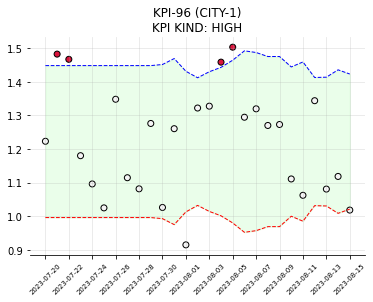

In [25]:
w_city_v = w_city.value
w_kpi_v = w_kpi.value
w_days_v = w_days.value
w_std_v = w_std.value

# To change the graph, pick your parameters (City, KPI, Days, σ) and re-run this cell.
# If it doesn't work, re-run the cell above, pick your parameters again, THEN re-run this cell.

plot_anomalies(w_city_v, w_kpi_v, w_days_v, w_std_v)

# RANKING CITIES BY KPI PERFORMANCE

# A function to find anomaly counts of each city's KPIs


In [14]:
def count_anomalies(city_name, kpi):
    df = city_dfs[city_name]
        
    low_lims, up_lims = plot_threshold(city_name, kpi, w_days_v, 2, plot=0)
    values = df[kpi]
    kind = kpi_types[kpi]

    if kind=="LOW":
        lims = low_lims
    else:
        lims = up_lims
    total_anomalies = 0
    for i in range(len(values)):
        v = values[i]
        l = lims[i]
 
        if is_anomaly(v,l,kind):
            total_anomalies += 1
            
    return total_anomalies

## Functions for finding statistics of a KPI for every city

In [15]:
city_group_A = ['CITY-1', 'CITY-22', 'CITY-20', 'CITY-18', 'CITY-8', 'CITY-14', 'CITY-9', 'CITY-23', 'CITY-3']
city_group_B = ['CITY-17', 'CITY-16', 'CITY-5', 'CITY-2', 'CITY-24', 'CITY-21', 'CITY-10', 'CITY-12', 'CITY-11']
city_group_C = ['CITY-13', 'CITY-4', 'CITY-19', 'CITY-6', 'CITY-3', 'CITY-23', 'CITY-7', 'CITY-15', 'CITY-9']

In [16]:
"""
city_stats = 
 {metric1: DataFrame(rows=cities, columns=kpis),
 metric2: DataFrame(rows=cities, columns=kpis),
 ...
 }
 
"""


def get_stat(metric, city, kpi):
    
    data = city_dfs[city][kpi]
    
    if metric == "Anomaly":
        return count_anomalies(city, kpi)
    elif metric == "Median":
        return np.median(data)
    else:
        return np.mean(data)

    
def compare_cities(kpi, cities):
    city_stats = dict()
    metrics = ["Anomaly","Median","Mean"]
    for metric in metrics:
        stats = list()
        for city in list(cities):
            stat = get_stat(metric, city, kpi)
            stats.append(stat)
        city_stats[metric] = pd.Series(stats,index=cities)
    
    return city_stats

def all_equal(lst):
    return all(v == lst[0] for v in lst)


## Creating functions to show city rankings

In [17]:
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
rescale2 = lambda y: 1 - (y - np.min(y)) / (np.max(y) - np.min(y))

anomaly_cmap = plt.get_cmap("autumn")
other_cmap = plt.get_cmap("RdYlGn")

def top_cities(kpi, cities=cities.values()):
    
    kind = kpi_types[kpi]
    city_metric_rankings = compare_cities(kpi, cities)
    metrics = ["Anomaly","Median","Mean"]

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes = axes.reshape(1,3)[0]
    
    for i in range(len(metrics)):

        metric = metrics[i]
        ax = axes[i]
        
        metric_series = city_metric_rankings[metric]
        asc = (kind != "LOW") or (metrics[i] == "Anomaly")

        ordered_series = metric_series.sort_values(ascending=asc).iloc[-9:]
        ordered_cities = ordered_series.index[-9:]
        ordered_values = ordered_series.iloc[-9:]

        if metric=="Anomaly":
            if all_equal(ordered_values):
                ax.barh(ordered_cities, ordered_values)
            else:
                ax.barh(ordered_cities, ordered_values, color=anomaly_cmap(rescale2(ordered_values)))
        else:
            if not asc:
                ax.barh(ordered_cities, ordered_values, color=other_cmap(rescale(ordered_values)))
            else:
                ax.barh(ordered_cities, ordered_values, color=other_cmap(rescale(ordered_values))[::-1])
                
        ax.set_title(f"{kpi}\nKPI KIND: {kind}\nORDERED BY {metric.upper()}")
    return

In [18]:
w_kpi2 = widgets.Dropdown(
    options=kpis,
    value=kpis[0],
    description='KPI:'
)
display(w_kpi2)

Dropdown(description='KPI:', options=('KPI-2', 'KPI-4', 'KPI-5', 'KPI-6', 'KPI-8', 'KPI-9', 'KPI-10', 'KPI-11'…

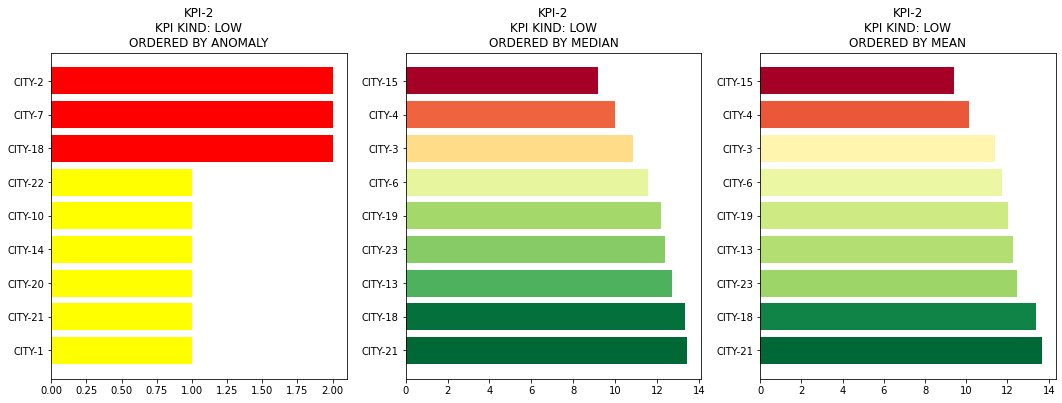

In [19]:
w_kpi2_v = w_kpi2.value

# To change the graph, pick your kpi and re-run this cell.
# If it doesn't work, re-run the cell above, pick your parameters again, THEN re-run this cell.

top_cities(w_kpi2_v) # All (given) cities

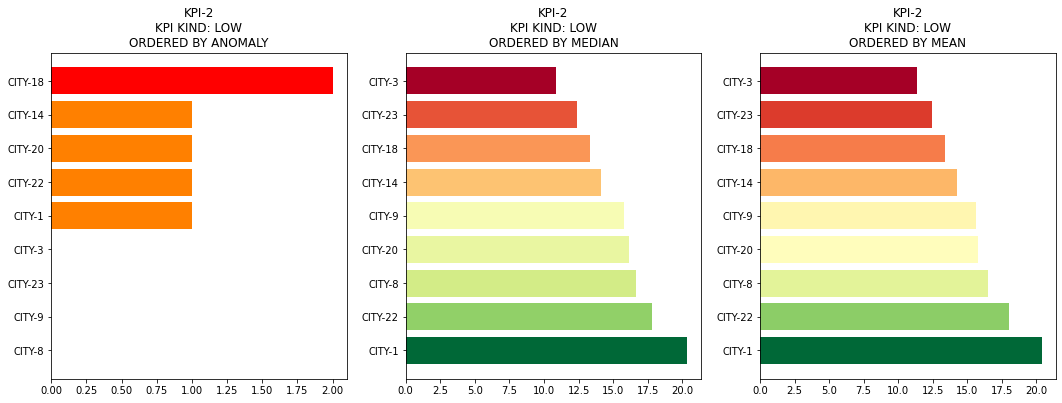

In [20]:
w_kpi2_v = w_kpi2.value

top_cities(w_kpi2_v, city_group_A)

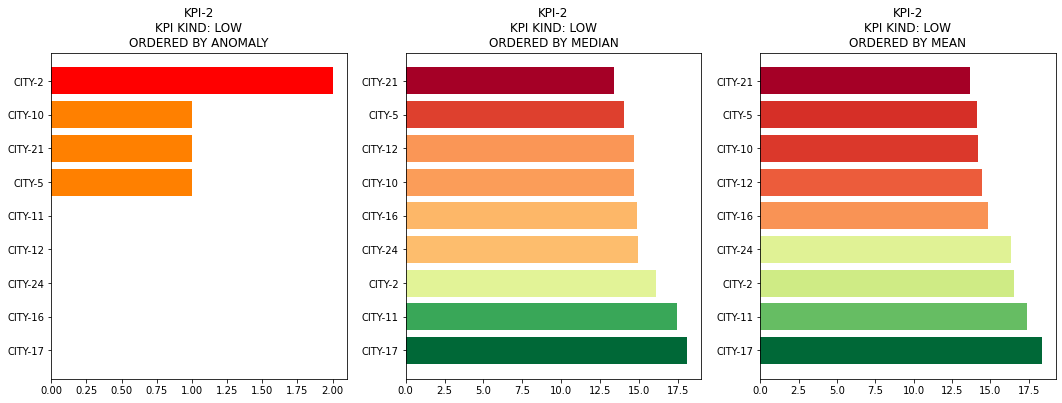

In [21]:
w_kpi2_v = w_kpi2.value

top_cities(w_kpi2_v, city_group_B)

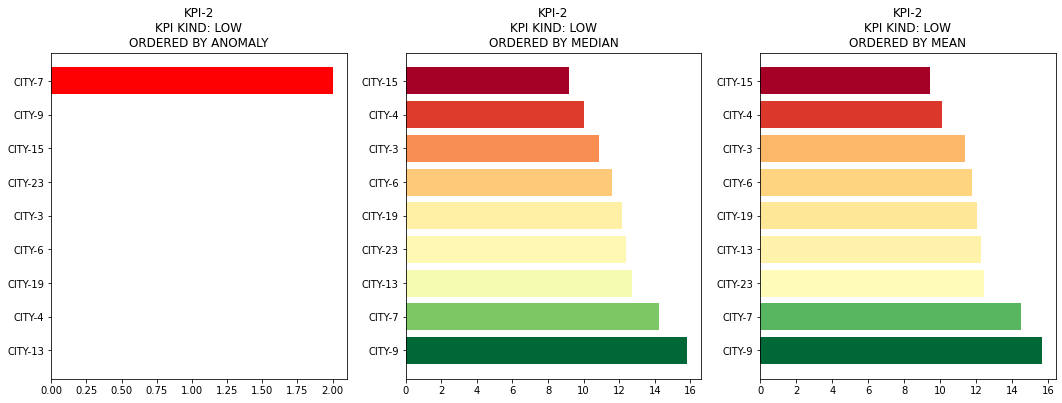

In [22]:
w_kpi2_v = w_kpi2.value

top_cities(w_kpi2_v, city_group_C)